# TALLER EVALUATIVO MNIST FASHION
Nombre: Nicolas Andres Rodriguez Lasso

# Importacion

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

Extraccion y separacion de datos del dataset

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

Visualizacion del dataset

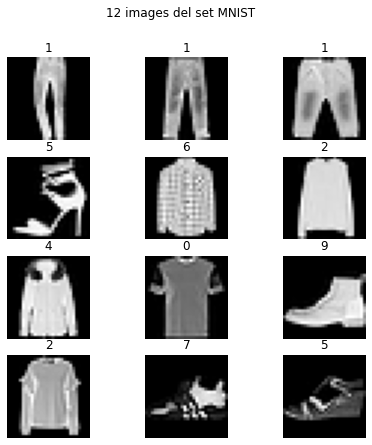

In [4]:
imagenes = np.random.randint(0,x_train.shape[0],12)
plt.figure(figsize=(7,7))
for i in range(len(imagenes)):
    img = x_train [imagenes[i],:,:]
    plt.subplot(4,3,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.title(y_train[imagenes[i]])
plt.suptitle('12 images del set MNIST')
plt.show()

In [5]:
#Normalizar los datos:
X_train = x_train/255.0
X_test = x_test/255.0

In [6]:
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [7]:
print(X_train.shape)

(60000, 28, 28)


# Entrenamiento

In [8]:
#Indicar que solo se usara escala de grises
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Se contruyo el modelo con 2 capas convolucionales de 12 y 18 filtros respectivamente; y 3 ocultas de 120 y 100 neuronas con activacion softmax.

In [45]:
#Build the Neural network model
modelo = Sequential()
modelo.add(Conv2D(filters=12,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(filters=18, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the network to make it a vector and create the neural network with 2 hidden layers
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(nclasses,activation='softmax'))

In [46]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 12)        312       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 18)          5418      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 18)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 288)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

El modelo se compilo y entreno con de 10 Epochs y con aumento en el batch size. Se utilizo el optimizador adam, sin embargo con un poco mas de epochs lograria superar el 90%.

In [47]:
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
modeloEntrenado = modelo.fit(X_train,Y_train,epochs=10,batch_size=150,verbose=2,validation_data=(X_test,Y_test))

Epoch 1/10
400/400 - 10s - loss: 0.2183 - accuracy: 0.9191 - val_loss: 0.2860 - val_accuracy: 0.9014 - 10s/epoch - 26ms/step
Epoch 2/10
400/400 - 11s - loss: 0.2063 - accuracy: 0.9231 - val_loss: 0.2843 - val_accuracy: 0.9011 - 11s/epoch - 27ms/step
Epoch 3/10
400/400 - 10s - loss: 0.1997 - accuracy: 0.9259 - val_loss: 0.2977 - val_accuracy: 0.8921 - 10s/epoch - 25ms/step
Epoch 4/10
400/400 - 11s - loss: 0.1931 - accuracy: 0.9271 - val_loss: 0.2831 - val_accuracy: 0.9022 - 11s/epoch - 28ms/step
Epoch 5/10
400/400 - 11s - loss: 0.1823 - accuracy: 0.9317 - val_loss: 0.2794 - val_accuracy: 0.9042 - 11s/epoch - 28ms/step
Epoch 6/10
400/400 - 12s - loss: 0.1753 - accuracy: 0.9346 - val_loss: 0.2939 - val_accuracy: 0.8983 - 12s/epoch - 29ms/step
Epoch 7/10
400/400 - 12s - loss: 0.1700 - accuracy: 0.9359 - val_loss: 0.2940 - val_accuracy: 0.9006 - 12s/epoch - 29ms/step
Epoch 8/10
400/400 - 12s - loss: 0.1640 - accuracy: 0.9385 - val_loss: 0.2781 - val_accuracy: 0.9077 - 12s/epoch - 29ms/step


In [58]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 89.9%


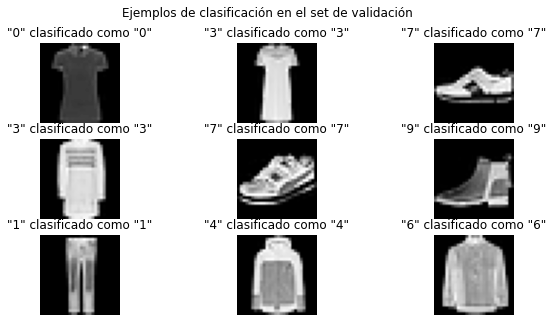

In [59]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()

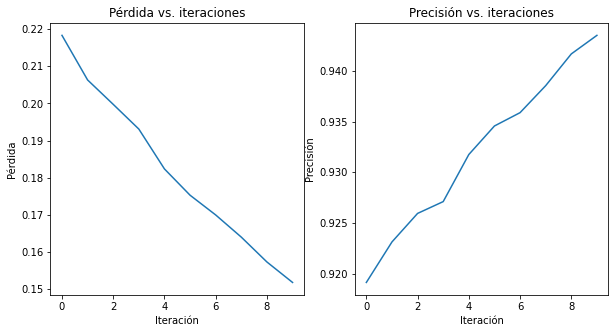

In [60]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

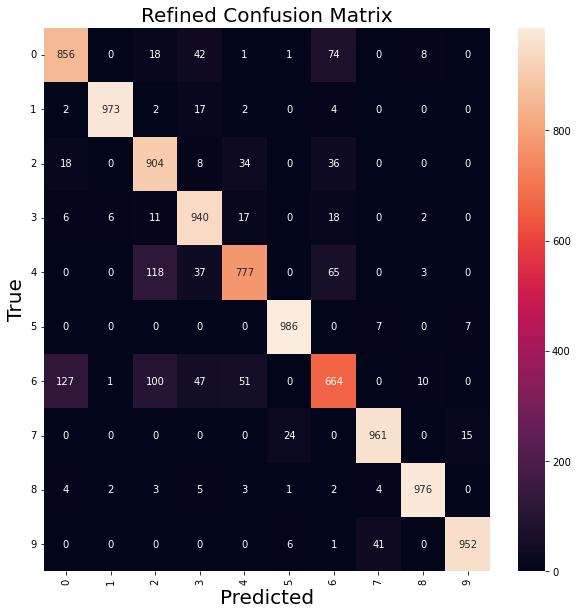

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['0','1','2','3','4','5','6','7','8','9']
#Y_pred = modelo.predict(X_test)
#classes_y=np.argmax(Y_pred,axis=1)
y_true=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, classes_y)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

Grafica de datos por conjunto de entrenamiento y de prueba

Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


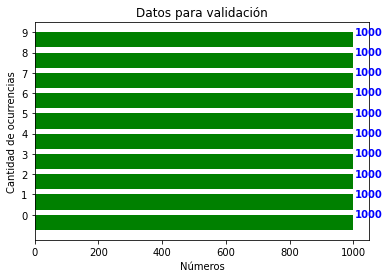

In [62]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.DataFrame(y_test, columns = ['Número'])
conteo=Counter(y_test)
conteo_ordenado = [0 for i in range(10)]
print(conteo)
for num, cont in conteo.items():
  conteo_ordenado[num] = cont 
print(conteo_ordenado)

fig, ax = plt.subplots() 
ind = np.arange(len(conteo_ordenado))  #ubicaciones de los grupos
width = 0.75  #ancho de la barra
ax.barh(ind, conteo_ordenado, width, color = "green") 

ax.set_yticks(ind+width/2)  
ax.set_yticklabels(class_names, minor=False)
plt.ylabel('Cantidad de ocurrencias')
plt.xlabel('Números')
plt.title('Datos para validación')
for i, v in enumerate(conteo_ordenado):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()